In [1]:
import unet 
from generator import Generator 

import numpy as np 
import os 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline

C:\Users\mohit\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [46]:
def get_model(name): 
    return os.path.join('models', name+'.h5')

def inference(model, batch): 

    print(model.name) 
    preds = model.predict(batch[0])
    
    for i in range(batch[0].shape[0]): 
        
        ground_truth = batch[0][i].reshape(generator.scale[0], generator.scale[1], 3)
        plt.figure(figsize=(20, 6))
        plt.subplot(1, 4, 1); plt.title('Input Image')
        plt.imshow(ground_truth)

        plt.subplot(1, 4, 2); plt.title('Ground Truth Label')
        plt.imshow(batch[1][i].reshape(gen.scale), cmap='Blues')

        pred = preds[i].reshape(gen.scale)
        plt.subplot(1, 4, 3); plt.title('Predicted')
        plt.imshow(pred, cmap='Blues')
        
        rgb = np.zeros_like(ground_truth)
        rgb[:, :, 0] = pred * 255
        overlay = cv2.addWeighted(ground_truth, 1, rgb, 0.4, 1)
        plt.subplot(1, 4, 4); plt.title('Overlay')
        plt.imshow(overlay)
        plt.show()
        
        

def plot_history(history_dict, name, metric='loss'): 

    loss_values = history_dict['{}'.format(metric)]
    val_loss_values = history_dict['val_{}'.format(metric)]
    epochs = range(1, len(history_dict[metric]) + 1)

    plt.figure(figsize=(16, ))
    plt.plot(epochs, loss_values, label='Training {}'.format(metric))
    plt.plot(epochs, val_loss_values, label='Validation {}'.format(metric))
    plt.title('{} Training and Validation {}'.format(name, metric))
    plt.xlabel('epochs')
    plt.ylabel('{}'.format(metric))
    plt.legend()
    
    save_path = os.path.join('img', '{}_{}.png'.format(name, metric))
    plt.savefig(save_path)
    plt.show()

In [47]:
generator = Generator(train=False, batch_size=1)
batch = next(generator)

In [48]:
#all the models 
control_overfit = get_model('control_model')
control_best = get_model('control_model-checkpoint')
v1_overfit = get_model('model_V1')
v1_model = get_model('model_V1-checkpoint')

## Loss History 

In [50]:
# loss histories - from floydhub logs 

control_hist = {'val_loss': [0.65394206964749602, 0.54836606979370117, 0.56923669576644897, 0.56746268272399902, 0.5862271785736084, 0.58845710754394531, 0.58845263719558716, 0.58843535184860229],
                'val_IOU_loss': [0.34605793015026243, 0.45163393020629883, 0.43076330423355103, 0.43253734707832336, 0.41377285122871399, 0.41154289245605469, 0.41154736280441284, 0.41156464815139771],
                'loss': [0.67856052082667007, 0.082432464040192929, 0.017793723267789253, 0.011068959513135117, 0.0081630819815895587, 0.0057924406827466884, 0.0055196881294250488, 0.0055196881294250488],
                'IOU_loss': [0.32143947936887229, 0.91756753596789675, 0.98220627673221073, 0.98893104048686487, 0.99183691801841045, 0.99420755931725335, 0.99448031187057495, 0.99448031187057495]}

model1_hist = {'val_loss': [0.70025548846920982, 0.51414310932159424, 0.5150306224822998, 0.4883912205696106, 0.5230259895324707, 0.49747556447982788, 0.49423021078109741, 0.522491455078125, 0.49543291330337524, 0.48386275768280029, 0.55612492561340332, 0.53057944774627686, 0.53133320808410645, 0.52856159210205078, 0.50251585245132446, 0.52331018447875977],
               'val_IOU_loss': [0.29974451146607289, 0.48585686087608337, 0.48496940732002258, 0.5116087794303894, 0.47697398066520691, 0.50252443552017212, 0.50576978921890259, 0.47750857472419739, 0.50456708669662476, 0.51613724231719971, 0.44387510418891907, 0.46942055225372314, 0.46866679191589355, 0.47143843770027161, 0.49748414754867554, 0.47668984532356262], 
               'loss': [0.62305209650602456, 0.027110576306052108, 0.0074291929165781123, 0.0041307863596337369, 0.0034637114156470367, 0.0029091360644072327, 0.0025544560207994443, 0.0023940693866158153, 0.002339216060410623, 0.0022740805608571289, 0.001348818212456346, 0.0011783563547103336, 0.0011260302395566925, 0.0010987357777441234, 0.0010926615078726239, 0.0010850247193884253],
               'IOU_loss': [0.37694790358473135, 0.97288942369394793, 0.99257080708342194, 0.99586921364036629, 0.99653628858435295, 0.99709086393559276, 0.9974455439792006, 0.99760593061338421, 0.99766078393958935, 0.99772591943914291, 0.99865118178754364, 0.99882164364528969, 0.99887396976044329, 0.99890126422225589, 0.99890733849212743, 0.99891497528061157]}

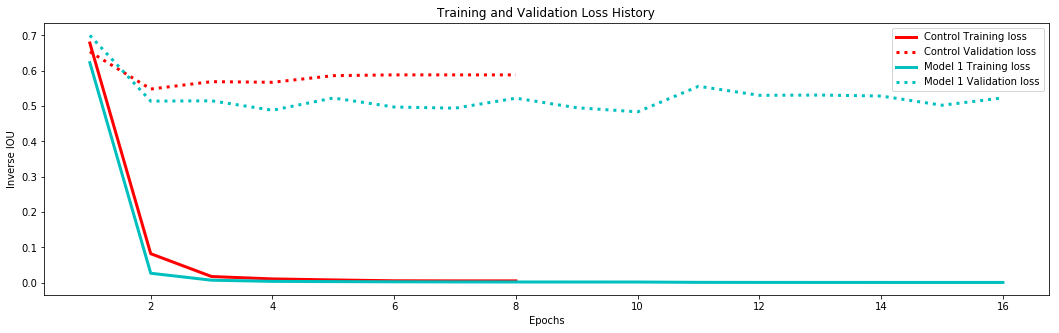

In [95]:
metric = 'loss'
hists = [control_hist, model1_hist]
names = ['Control', 'Model 1']
colors = ['r', 'c', 'k']

plt.figure(figsize=(18, 5))
for i in range(len(hists)): 
    history_dict = hists[i]
    name = names[i]
    color = colors[i]
    
    loss_values = history_dict['{}'.format(metric)]
    val_loss_values = history_dict['val_{}'.format(metric)]
    epochs = range(1, len(history_dict[metric]) + 1)

    
    plt.plot(epochs, loss_values, color+'-', linewidth=3,
             label='{} Training {}'.format(name, metric))
    
    plt.plot(epochs, val_loss_values, color+':', linewidth=3,
             label='{} Validation {}'.format(name, metric))
    
plt.title('Training and Validation Loss History')
plt.xlabel('Epochs')
plt.ylabel('Inverse IOU')  
plt.legend()

save_path = os.path.join('img', 'loss_hist.png')
plt.savefig(save_path)
plt.show()

input images resized to (400, 640)
model compiled
model_1


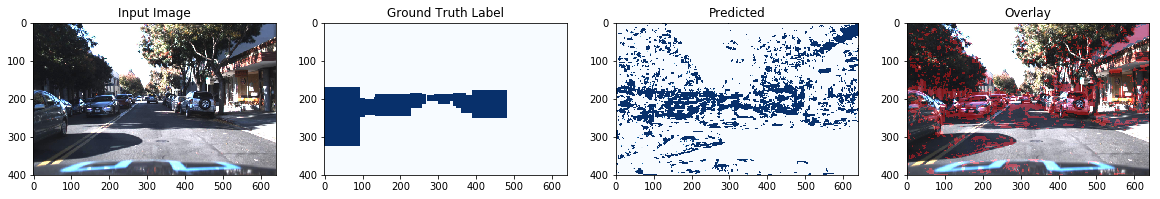

In [24]:
control= unet.build_model()
control.load_weights(control_best)
inference(control, batch)

input images resized to (400, 640)
model compiled
model_1


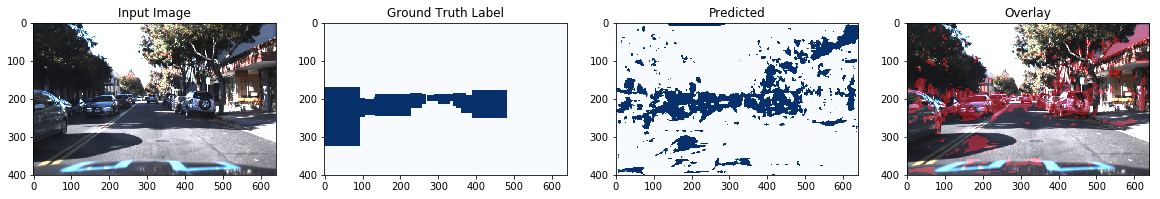

In [25]:
model1 = unet.build_model(batchnorm=True)
model1.load_weights(v1_model)
inference(model1, batch)